# Naive Bayes
- Simple Probabilistic model for Classification
- Bayes Theorem : P(h|d) = (P(d|h) * P(h)) / P(d)
- P(h|d) is the probability of hypothesis h given the data d. This is called the posterior probability.
- P(d|h) is the probability of data d given that the hypothesis h was true.
- P(h) is the probability of hypothesis h being true (regardless of the data). This is called the prior probability of h.
- P(d) is the probability of the data (regardless of the hypothesis).

- It is called naive Bayes or idiot Bayes because the calculation of the probabilities for each hypothesis are simplified to make their calculation tractable

- Rather than attempting to calculate the values of each attribute value P(d1, d2, d3|h), they are assumed to be conditionally independent given the target value and calculated as P(d1|h) * P(d2|H) and so on.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
class NaiveBayes:
    def __init__(self, X, y):
        self.no_examples, self.no_features = X.shape
        self.no_classes = len(np.unique(y))
        self.eps = 1e-6

    def fit(self, X):
        self.classes_mean = {}
        self.classes_variance = {}
        self.classes_prior = {}
        for c in range(self.no_classes):
            X_c = X[y == c]
            self.classes_mean[str(c)] = np.mean(X_c, axis=0)
            self.classes_variance[str(c)] = np.var(X_c, axis=0)
            self.classes_prior[str(c)] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        probs = np.zeros((self.no_examples, self.no_classes))
        for c in range(self.no_classes):
            prior = self.classes_prior[str(c)]
            probs_c = self.density_function(X, self.classes_mean[str(c)], self.classes_variance[str(c)])
            probs[:, c] = probs_c + np.log(prior)
        return np.argmax(probs, 1)

    def density_function(self, x, mean, sigma):
        const = -self.no_features / 2 * np.log(2 * np.pi) - 0.5 * np.sum(np.log(sigma + self.eps))
        probs = 0.5 * np.sum(np.power(x - mean, 2) / (sigma + self.eps), 1)
        return const - probs

# Probability Distribution Finction:
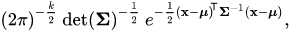

- Multiplying 0-1 probability results in a really small number
- Taking log converts the 0-1 probability to -inf to 0
- Log also converts multiplication to addition
- The resulting sums are usually manageable numbers.

In [ ]:
X = np.loadtxt("/content/data.txt", delimiter=",")
y = np.loadtxt("/content/targets.txt") - 1

In [ ]:
print(X.shape, y.shape)

(90, 2) (90,)


In [ ]:
NB = NaiveBayes(X, y)
NB.fit(X)

In [ ]:
y_pred = NB.predict(X)
print(f"Accuracy: {(sum(y_pred==y)/X.shape[0])*100}")

Accuracy: 90.0
